# BoomBikes Linear Regression model

## Problem Statement:
### We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Reading and Understanding the Data


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# All the required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Read the csv file into a Day Dataframe
Day = pd.read_csv("day.csv")

In [4]:
# Analyse the data with a first look at the head
Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Verify the number of rows and columns
Day.shape

(730, 16)

In [6]:
# Verify the data types and non null counts
Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# First look at the numerical values and various measures
Day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the Data

### The result variable will be Count(cnt). So visualise the values of this variable and its range using histogram and boxplot.

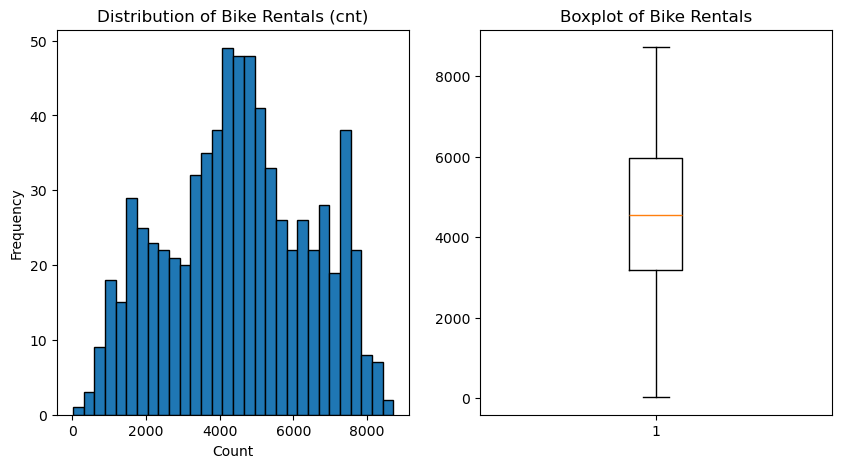

In [8]:
# Histogram and boxplot for cnt variable
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Day['cnt'], bins=30, edgecolor='black')
plt.title('Distribution of Bike Rentals (cnt)')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(Day['cnt'])
plt.title('Boxplot of Bike Rentals')
plt.show()

### Observe the numerical columns using a pairplot. This helps determine if linear regression makes sense for this data or not. 
### Verify the spread for each variable with "cnt" variable.

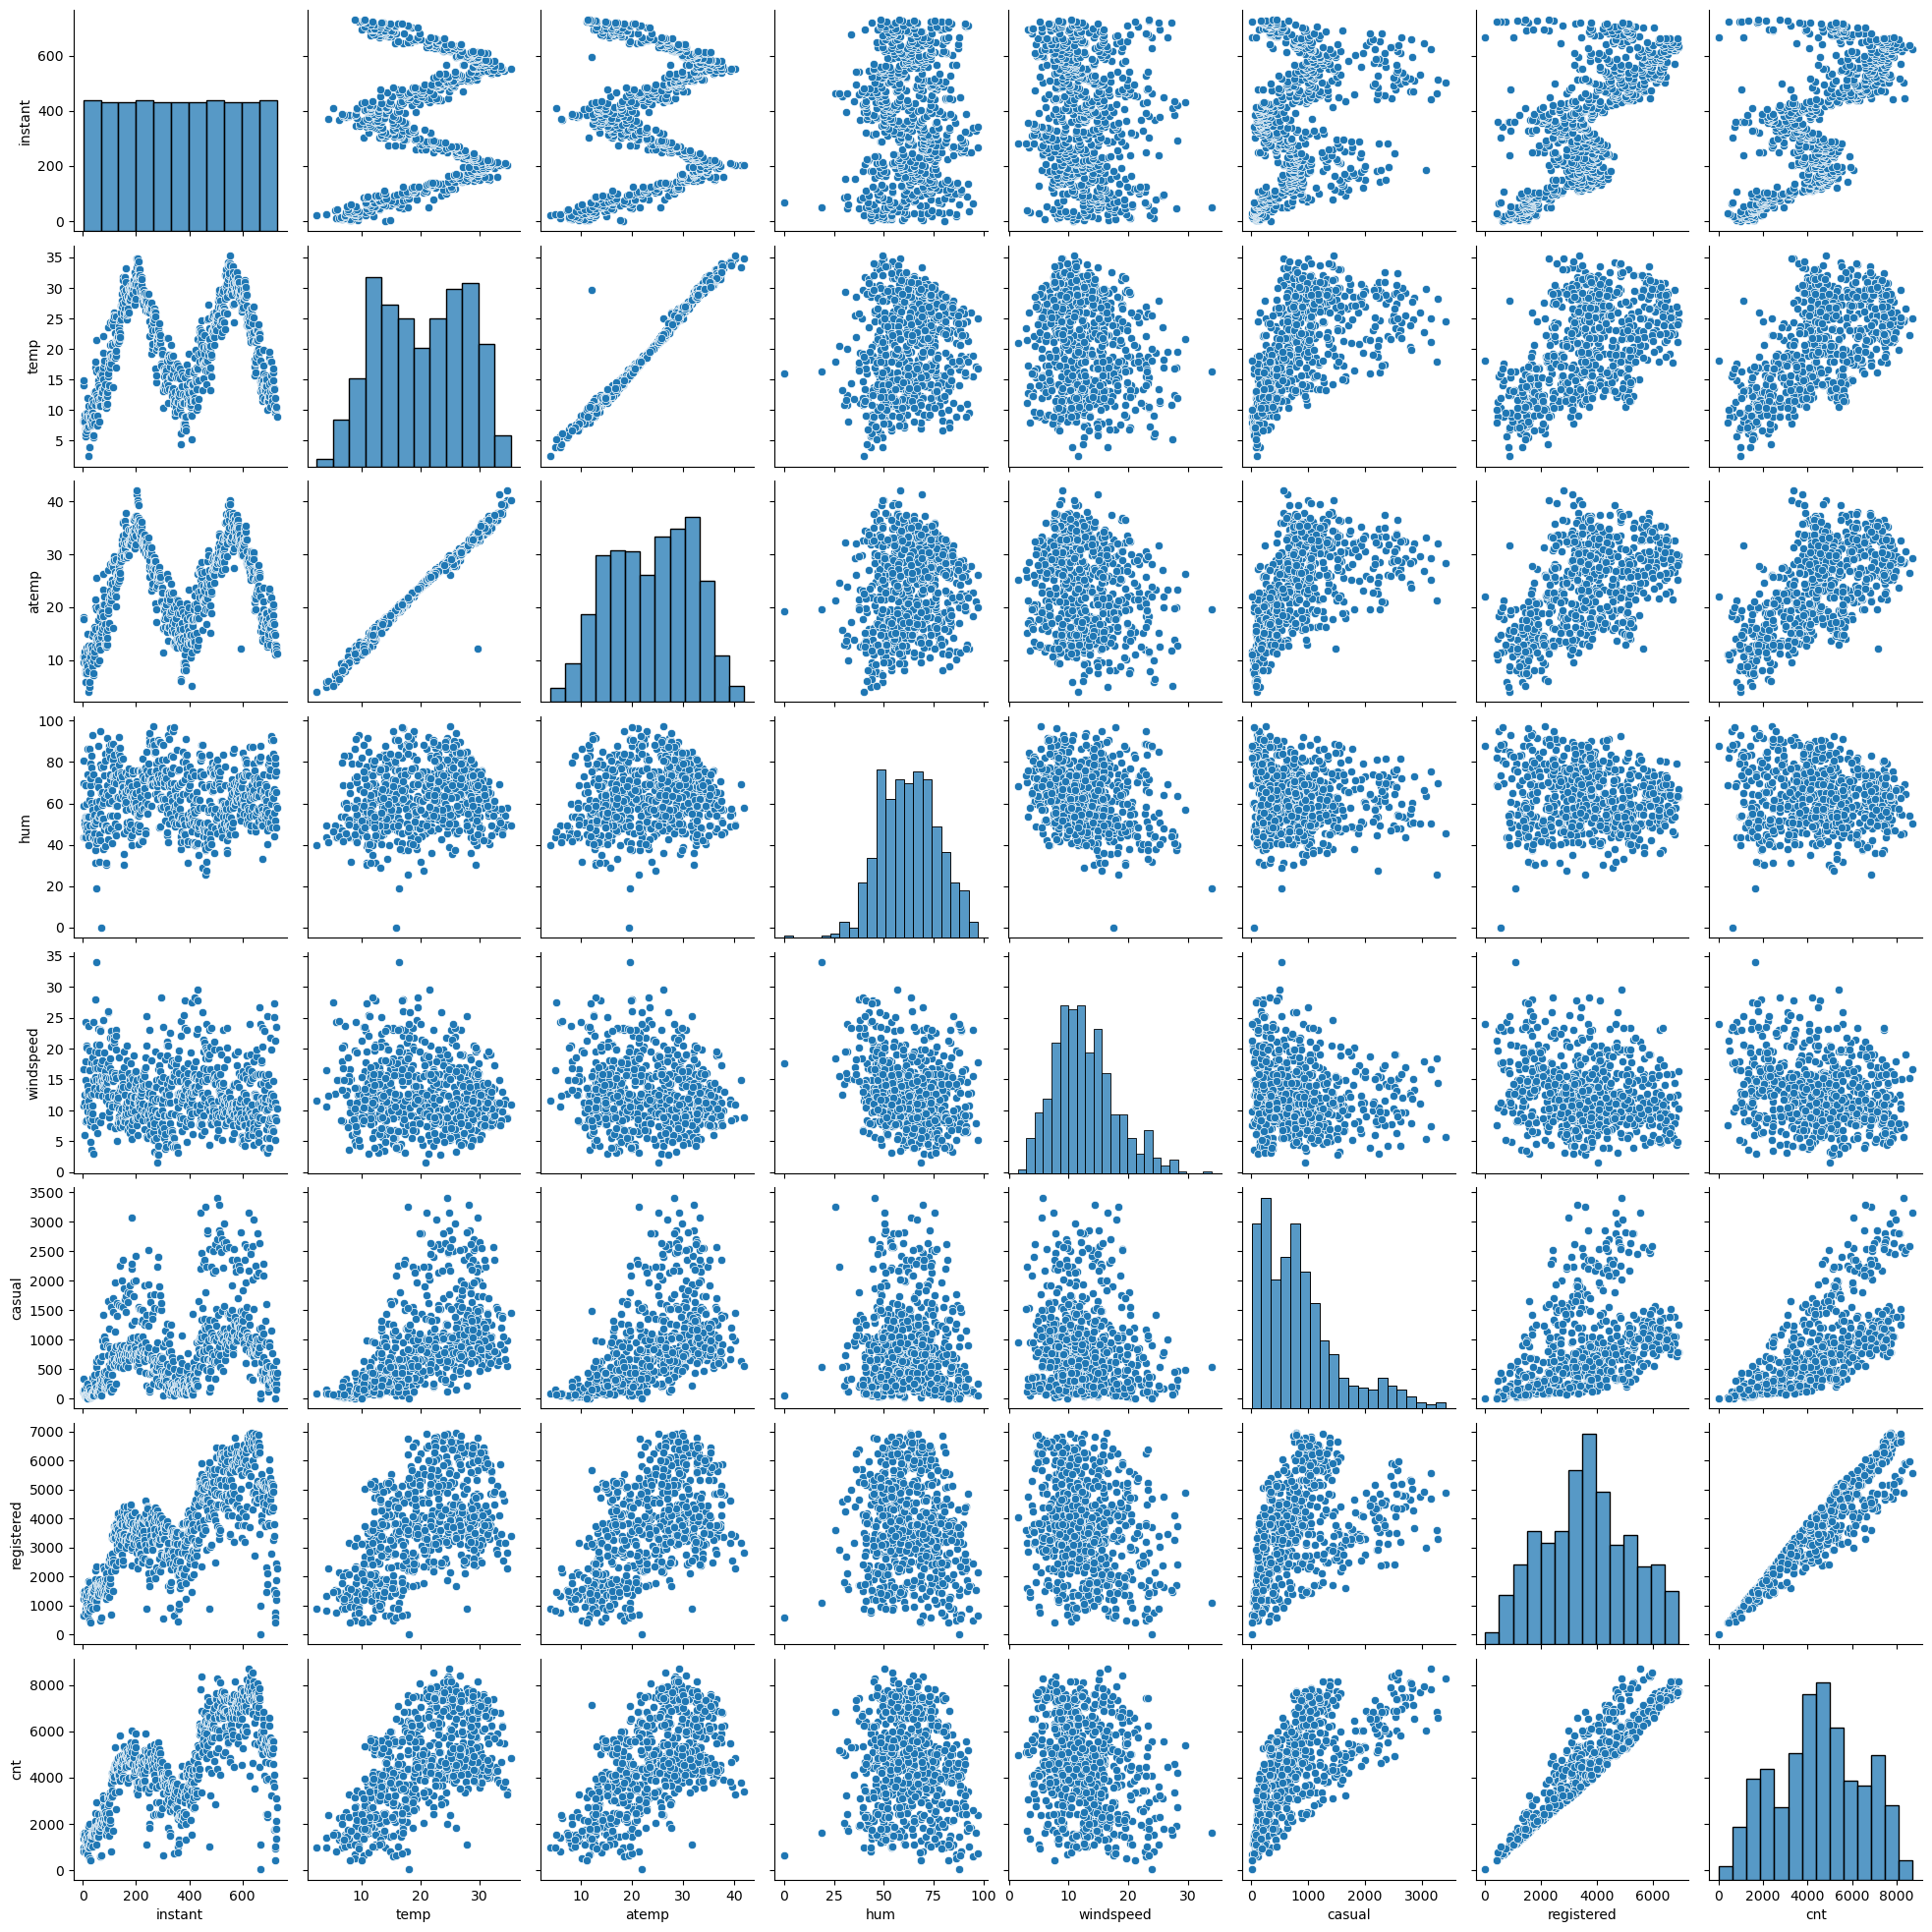

In [9]:
#Drop non numerical variables from the Day dataframe for this plot
DayNumerical = Day.drop(['season', 'yr', 'mnth','holiday','weekday','workingday','weathersit'], axis=1)
sns.pairplot(DayNumerical)
plt.show()

## Convert Categorical Variables

In [10]:
# Map season codes to categorical strings
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
Day['season'] = Day['season'].map(season_map)

In [11]:
# Verify that season column has been replaced with categorical variables
Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Map weathersit codes to categorical strings
weathersit_map = {
    1: 'clear',
    2: 'mist',
    3: 'light_snow_rain',
    4: 'heavy_rain_snow'
}
Day['weathersit'] = Day['weathersit'].map(weathersit_map)

In [13]:
# Verify that weathersit_map column has been replaced with categorical variables
Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Convert remaining categorical columns like holiday, workingday, weekday and mnth
Day['holiday'] = Day['holiday'].astype('category')
Day['workingday'] = Day['workingday'].astype('category')
Day['weekday'] = Day['weekday'].astype('category')
Day['mnth'] = Day['mnth'].astype('category')

In [15]:
# Verify the categorical variables like holiday, workingday, weekday and mnth have been replaced with the categories.
Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    object  
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    category
 6   weekday     730 non-null    category
 7   workingday  730 non-null    category
 8   weathersit  730 non-null    object  
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(5), object(3)
memory usage: 72.4+ KB


## Visualising Categorical Variables

### By comparing at the median of the box-plot, We can identify categorical variables which have impact on the result variable cnt. Few categorical variables which have same median can be ignored as they don't contribute significantly to the model

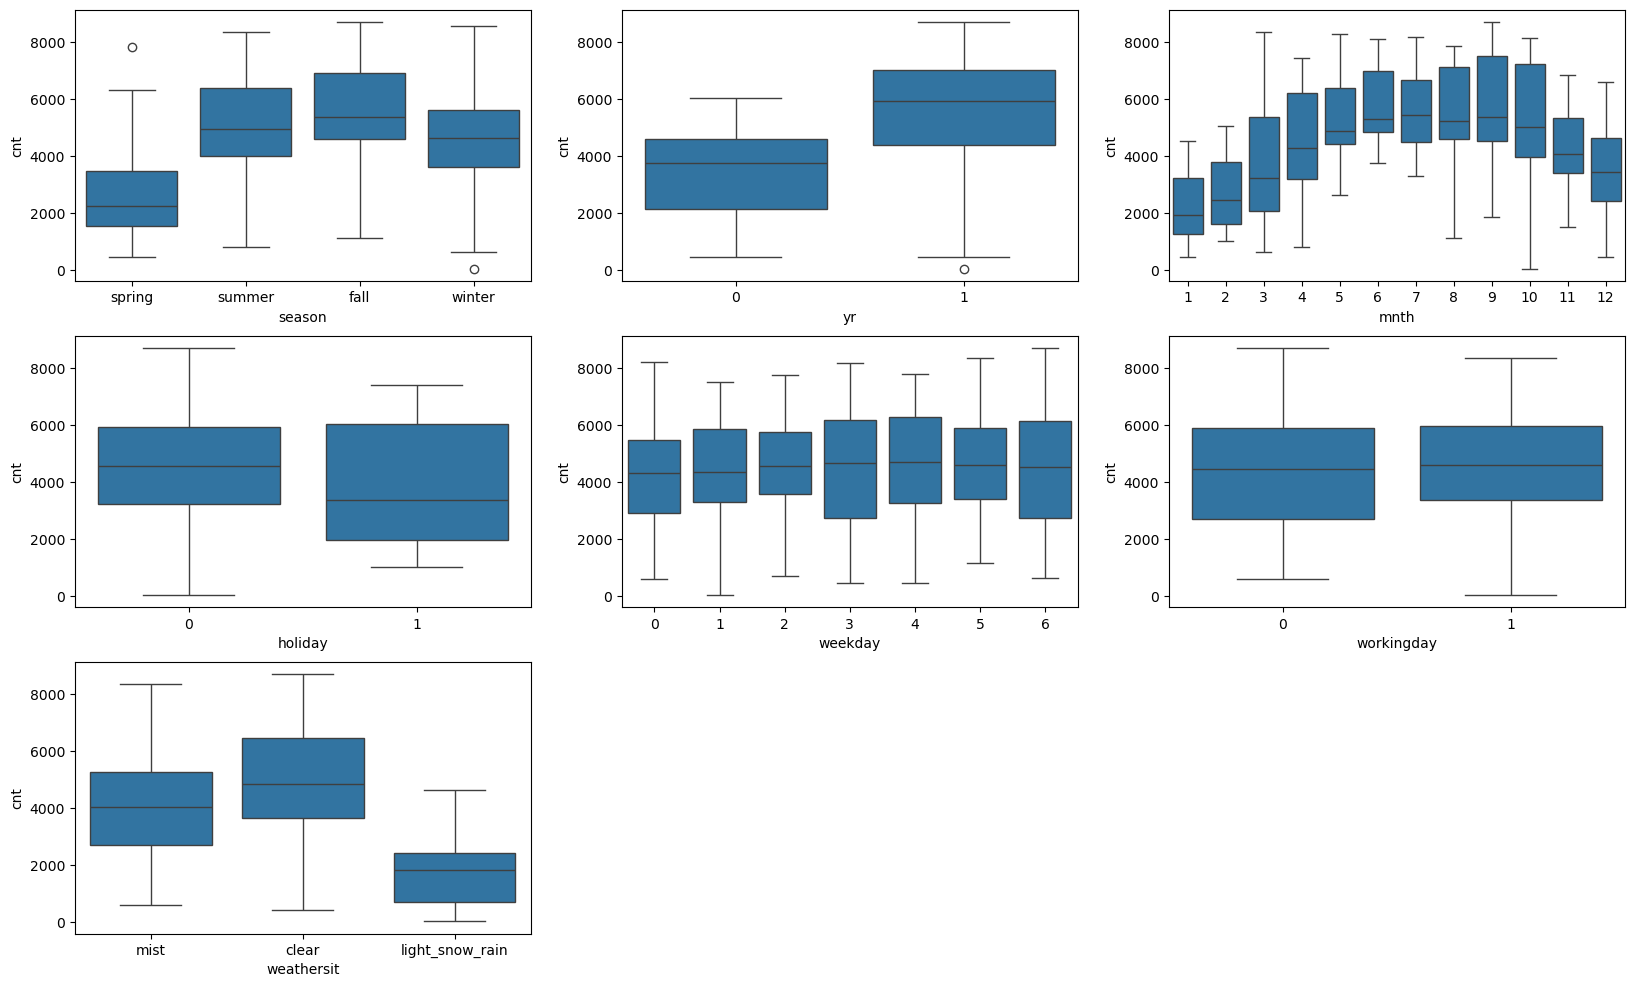

In [34]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = Day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Day)
plt.show()

### Examine correlation for numerical features

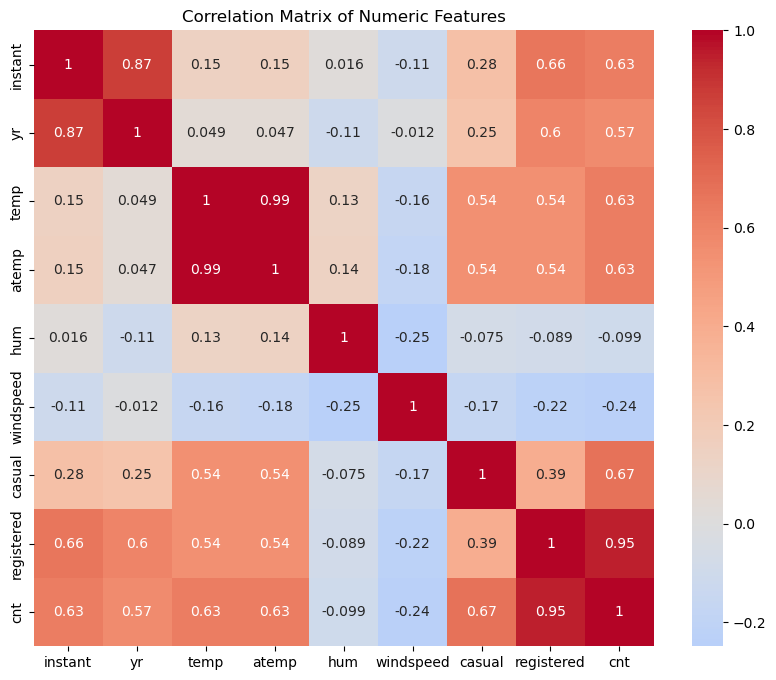

In [16]:
# Build a heatmap to examine correlation between numerical features.
numeric_cols = Day.select_dtypes(include=[np.number]).columns
correlation_matrix = Day[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Data Preparation and Feature Engineering

###  Drop columns that should not be used as predictors
### 'instant' is just an index
### 'dteday' is the date (we already have temporal features like mnth, weekday, yr)
### 'casual' and 'registered' are components of 'cnt', not independent predictors

In [17]:
# Drop the irrelevant columns
Day = Day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

print("Columns after dropping unnecessary features:")
print(Day.columns.tolist())
print(f"Shape: {Day.shape}")

Columns after dropping unnecessary features:
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
Shape: (730, 12)


### Month is an important variable as per the box-plot as the median shows variations.
### But, The difference in count month wise attributes more to the seasons they fall in and we already have a season column which is a better categorical variable. Hence dropping month as well as it causes unneccesary overhead of 11 columns for all months.

In [18]:
Day=Day.drop(['mnth'],axis=1)

### Weekday and working day are not showing much deviation in median as per box-plot. Converting them into dummy variables causes extra columns and overhead.

In [19]:
Day=Day.drop(['weekday','workingday'], axis=1)

In [20]:
#Apply one-hot encoding

# Identify categorical columns
categorical_cols = Day.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols}")

# drop_first=True prevents multicollinearity (dummy variable trap)
Day_encoded = pd.get_dummies(Day, columns=categorical_cols, drop_first=True)
#As int type
bool_cols = Day_encoded.select_dtypes(include='bool').columns
Day_encoded[bool_cols] = Day_encoded[bool_cols].astype(int)

print(f"\nShape after encoding: {Day_encoded.shape}")
print(f"New columns created: {Day_encoded.columns.tolist()}")

Categorical columns to encode: ['season', 'holiday', 'weathersit']

Shape after encoding: (730, 12)
New columns created: ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter', 'holiday_1', 'weathersit_light_snow_rain', 'weathersit_mist']


In [21]:
Day_encoded.head()

,yr,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_1,weathersit_light_snow_rain,weathersit_mist
0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1
1,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1
2,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0


## Splitting into training and testing sets

In [22]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Day_train, Day_test = train_test_split(Day_encoded, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

In [23]:
scaler = MinMaxScaler()

In [24]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_cols = Day_train.select_dtypes(include=[np.number]).columns

Day_train[numeric_cols] = scaler.fit_transform(Day_train[numeric_cols])

In [25]:
# Verify values after rescaling
Day_train.head()

,yr,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_1,weathersit_light_snow_rain,weathersit_mist
653,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,1.0,0.0,0.0,0.0
576,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,0.0,0.0,0.0,1.0
728,1.0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
#Verify that after rescaling the max value is 1
Day_train.describe()

,yr,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_1,weathersit_light_snow_rain,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,0.507843,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.025490,0.029412,0.343137
std,0.500429,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.157763,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Build a linear model with all variables

In [27]:
#Divide into X_train and y_train
y_train = Day_train.pop('cnt')
X_train = Day_train

In [28]:
#Build a linear model

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                         0.292661
yr                            0.230730
temp                          0.466757
atemp                         0.030935
hum                          -0.139412
windspeed                    -0.181570
season_spring                -0.075162
season_summer                 0.041563
season_winter                 0.087634
holiday_1                    -0.086288
weathersit_light_snow_rain   -0.240527
weathersit_mist              -0.053642
dtype: float64

In [111]:
#Verify the summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.7
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          7.42e-182
Time:                        20:42:56   Log-Likelihood:                 486.18
No. Observations:                 510   AIC:                            -948.4
Df Residuals:                     498   BIC:                            -897.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Check for the VIF values of the feature variables. 

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,374.28
2,atemp,365.47
3,hum,27.06
4,windspeed,4.87
5,season_spring,3.77
7,season_winter,3.18
6,season_summer,2.33
10,weathersit_mist,2.28
0,yr,2.08
9,weathersit_light_snow_rain,1.24


###  Some variables have a very high VIF. We need to drop few variables and verify VIF again.
### aTemp has a very high p value and hence can be dropped. It is also highly correlated with temp from the correlation matrix.

In [29]:
X = X_train.drop('atemp', axis=1)

In [30]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [31]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          4.78e-183
Time:                        23:10:59   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [32]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,27.02
1,temp,14.79
3,windspeed,4.64
4,season_spring,3.71
6,season_winter,3.05
9,weathersit_mist,2.28
5,season_summer,2.24
0,yr,2.07
8,weathersit_light_snow_rain,1.24
7,holiday_1,1.04


### Situation here is that the p-values are very low indicating that these variables are significant. But two variables hum and temp have a very high VIF (threshold is generally 5)
### Verified from the correlation matrix(above in this notebook) that the direct correlation between these variables or with other variables is negligible.

### Based on domain knowledge,  VIF is high for these 2 variables due to below reasons:
### 1. Because temp, humidity, and windspeed tend to have natural physical relationships, meaning:
### 2. High temperature ↔ lower humidity
### 3. Certain weather patterns link temp, humidity, windspeed together indirectly
### So VIF increases due to combined effects, not high pairwise correlation.This is normal in environmental/weather datasets.
### We can proceed without dropping any more columns because these VIF values are <30 and overall matrix is stable. p-values indicate both the columns temp and humidity are very significant 

# Residual Analysis of the train data

Text(0.5, 0, 'Errors')

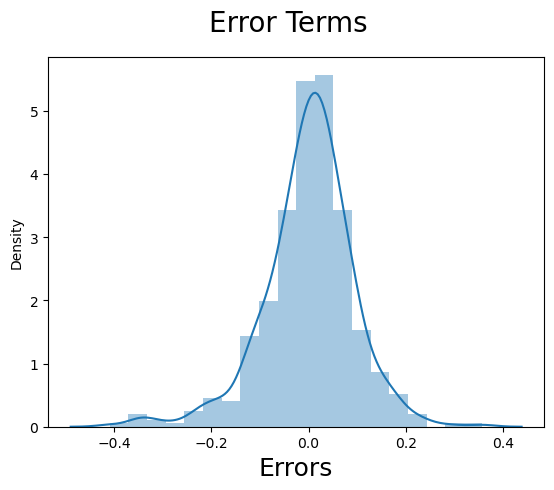

In [121]:
y_train_cnt = lr_2.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Making Predictions Using the Final Model

In [126]:
numeric_cols = Day_test.select_dtypes(include=[np.number]).columns

Day_test[numeric_cols] = scaler.transform(Day_test[numeric_cols])

In [127]:
Day_test.describe()

,yr,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,holiday_1,weathersit_light_snow_rain,weathersit_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.036530,0.027397,0.319635
std,0.500722,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.188034,0.163612,0.467403
min,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
y_test = Day_test.pop('cnt')
X_test = Day_test

In [134]:
X_test_m2 = sm.add_constant(X_test)

In [135]:
X_test_m2 = X_test_m2.drop(["atemp"], axis = 1)

In [137]:
y_pred_m2 = lr_2.predict(X_test_m2)

## Model evaluation

Text(0, 0.5, 'y_pred')

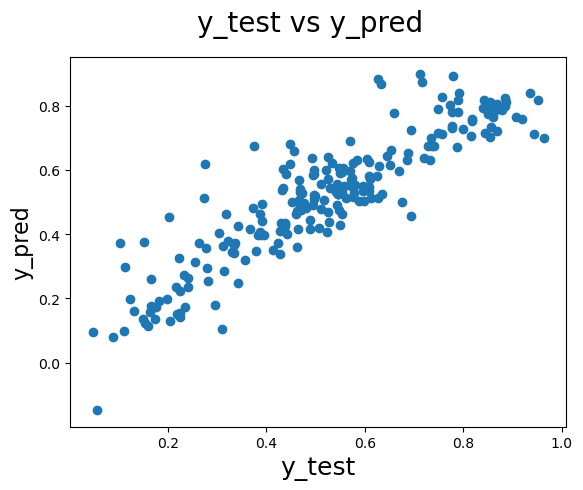

In [138]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## Equation of our best fitted line is :
### cnt = 0.2925 + 0.2307 * yr + 0.4961 * temp – 0.1390 * hum – 0.1827 * windspeed – 0.0746 * season_spring + 0.0421 * season_summer + 0.0883 * season_winter – 0.0865 * holiday_1 – 0.2409 * weathersit_light_snow_rain – 0.0537 * weathersit_mist


## Determining the r2 score of test data using sklearn library

In [139]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m2)

0.8063526208371381